In [1]:
%matplotlib inline
from rtxlib.rtx_run import setup_database, db
from analysis_lib.one_sample_tests import KolmogorovSmirnov
from analysis_lib.two_sample_tests import Ttest

index = "rtx3"
knob = "route_random_sigma"

# index = "rtx4"
# knob = "exploration_percentage"

setup_database(index)
results = db().get_all_data_points()

res = {}
data = {}
knobs = {}
for i in range(9):
    no = float("0."+str(i))
    res = [r for r in results if r[1][knob]==no]
    data[i] = [r[0] for r in res]
    knobs[i] = [r[1] for r in res]
    print "0."+str(i)+"'s: " + str(len(data[i]))

print "end."

> OEDA configuration: Using elasticsearch database.
0.0's: 30000
0.1's: 0
0.2's: 15342
0.3's: 0
0.4's: 22317
0.5's: 0
0.6's: 0
0.7's: 0
0.8's: 0
end.


[{u'tick': 56098, u'overhead': 1.605787790251994}, {u'tick': 56098, u'overhead': 3.3433065695820865}, {u'tick': 56102, u'overhead': 1.0602228971227081}, {u'tick': 56103, u'overhead': 1.3790927377025908}, {u'tick': 56105, u'overhead': 1.1497399700617186}, {u'tick': 56106, u'overhead': 9.962860390434864}, {u'tick': 56109, u'overhead': 1.921838971123049}, {u'tick': 56110, u'overhead': 2.8710648040060867}, {u'tick': 56111, u'overhead': 1.1761410946490087}, {u'tick': 56027, u'overhead': 1.9219404361252614}]
[{u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}, {u'route_random_sigma': 0}]


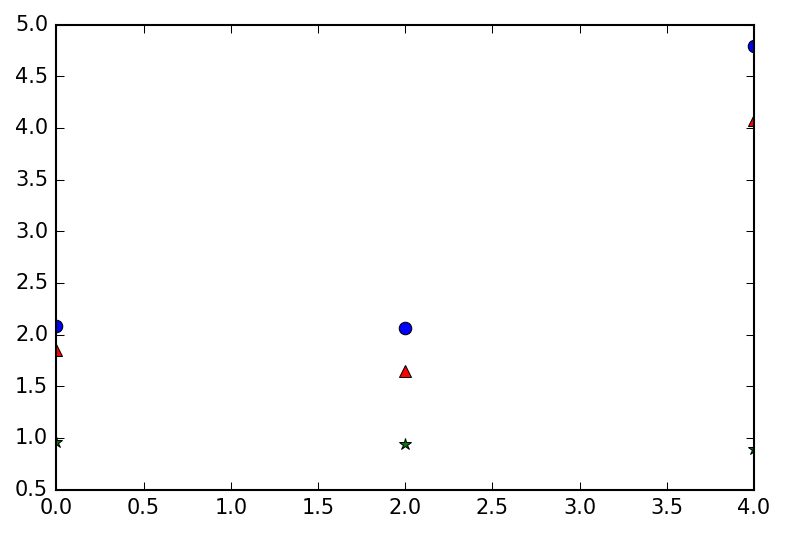

In [3]:
import matplotlib.pyplot as plt
from numpy import var, std
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

y_key = 'overhead'
threshold = 15000
# threshold = 30000
alpha = 0.05
keys = [0, 2, 4]
# keys = [0, 2, 4, 6]
#keys = [0, 1, 2, 3, 4, 5, 6, 8]

averages = []
variances = []
standard_deviations = []

print data[0][:10]
print knobs[0][:10]
# plt.plot(data[0])
# plt.show()
# print knobs[0][:3]

for i in keys:
    analysis_data = [r[y_key] for r in data[i]][:threshold]
    avg = sum(analysis_data) / float(len(analysis_data))
    averages.append(avg)
    variances.append(min(analysis_data))
    standard_deviations.append(std(analysis_data))
        
fig,ax = plt.subplots()
ax.plot(keys,averages, "o", label='averages')
ax.plot(keys,variances,"*", label='variances')
ax.plot(keys,standard_deviations,"^", label='standard_deviations')
 
# plt.legend(loc='best')
plt.show()

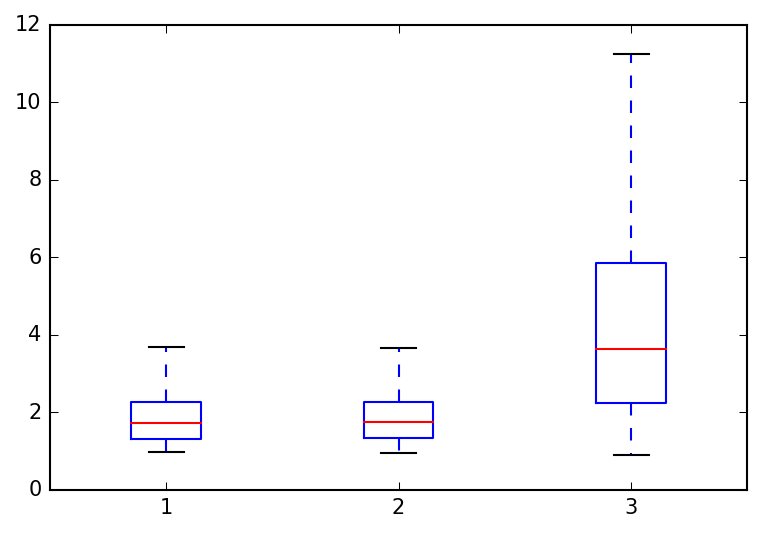

In [4]:
y_key = 'overhead'
alpha = 0.05
all_data = []

for i in keys:
    analysis_data = [r[y_key] for r in data[i]][:threshold]
    all_data.append(analysis_data)

plt.figure()
#plt.boxplot(all_data)
plt.boxplot(all_data, 0, '')
plt.show()       

[0.13268829563655771, 2.202162712464565e-16, 1.1329414408281021e-30]


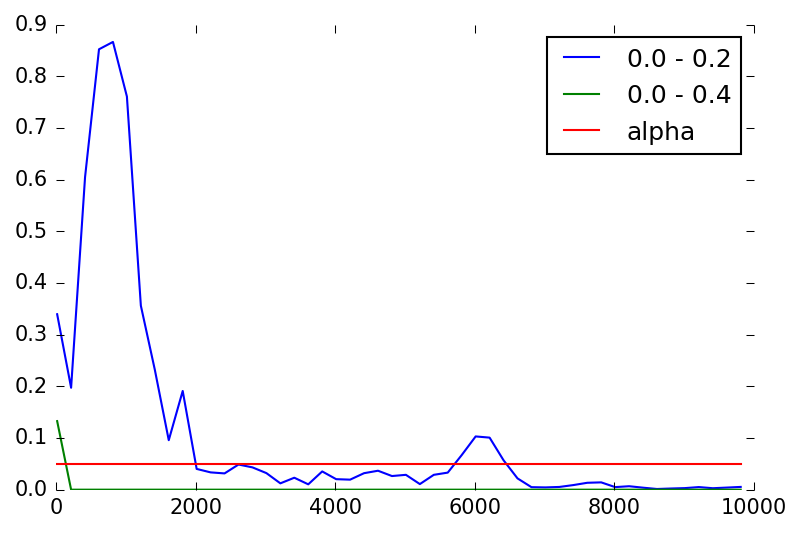

In [13]:
fake_run_id = "123456"
keys = [2, 4]
# keys = [2, 4, 6]
# keys = [1, 2, 3, 4, 5, 6, 8]
# keys = [4, 5, 6, 8]

sample_sizes = []
pvalues = {}

for i in keys:
    pvalues[i] = []

for threshold in range(10, 10000, 200):
    sample_sizes.append(threshold)
    
    analysis_data = {}
    analysis_data[0] = data[0][:threshold]
    
    for i in keys:   
        analysis_data[1] = data[i][:threshold]
        t = Ttest(fake_run_id, y_key, alpha=alpha).start(analysis_data, {})
        pvalues[i].append(t["pvalue"])

markers = ['1','2','3','4','s','p','*','h','H']
marker_index = 0

print pvalues[4][:3]

fig,ax = plt.subplots()
for i in keys:
    ax.plot(sample_sizes,pvalues[i],label='0.0 - 0.'+str(i))
#     ax.plot(x,y[i],markers[marker_index],label='0 - 0.'+str(i))
    marker_index += 1
ax.plot(sample_sizes,[0.05]*len(sample_sizes), label='alpha')
#ax.set_clip_on(False)
ax.set_frame_on(False)
#ax.get_xaxis().tick_bottom()
#ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

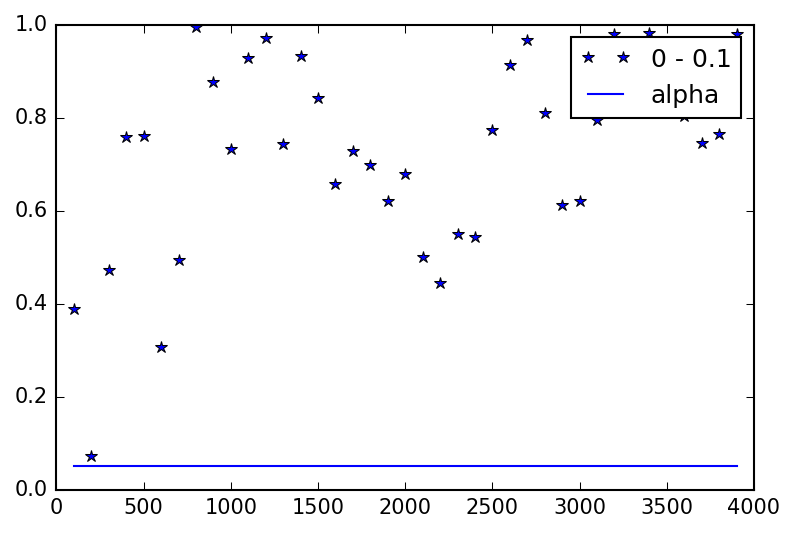

In [5]:
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

i = 1
x = []
y = {}
y[i] = []
alpha = 0.05
        
for threshold in range(100, 4000, 100):
    x.append(threshold)
    
    analysis_data = {}
    analysis_data[0] = data[1][:threshold]
    analysis_data[1] = data[3][:threshold]
    
    t = Ttest(fake_run_id, y_key, alpha=alpha).start(analysis_data, {})
    y[i].append(t["pvalue"])

    
fig,ax = plt.subplots()
ax.plot(x,y[i],'b*',label='0 - 0.'+str(i))
ax.plot(x,[0.05]*len(x), label='alpha')

plt.legend()
plt.show()